In [1]:
%run ../../__init__.py
%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
htune_dir = "/home/konstantin/personal/Summertime/runs/htune/scannet/"
evaluation_task = eva_ns.REL_POSE

In [3]:
methods = {
    'shi_hardnet': {eva_ns.COLOR: 'lightskyblue',  
                    eva_ns.LINE_STYLE: '-.',
                    eva_ns.ALIAS: 'Shi-Tomasi+HardNet'},
    
    'sift_hardnet': {eva_ns.COLOR: 'orange',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'SIFT+HardNet'},
    
    'superpoint_hardnet': {eva_ns.COLOR: 'gold',
                           eva_ns.LINE_STYLE: '-',
                           eva_ns.ALIAS: 'SuperPoint+HardNet'},
    
    'r2d2_hardnet': {eva_ns.COLOR: 'blue',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'R2D2+HardNet'},
    
    'keynet_hardnet': {eva_ns.COLOR: 'red',
                       eva_ns.LINE_STYLE: '-',
                       eva_ns.ALIAS: 'KeyNet+HardNet'},
    
    'disk_hardnet': {eva_ns.COLOR: 'purple',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'DISK+HardNet'},
    
    'rekd_hardnet': {eva_ns.COLOR: 'hotpink',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'REKD+HardNet'},
    
    'shiness_hardnet': {eva_ns.COLOR: 'cyan',
                        eva_ns.LINE_STYLE: '-',
                        eva_ns.ALIAS: 'NeSS-ST+HardNet'},
}

In [4]:
methods_hardnet_e_pyopengv = {
    eva_ns.BACKEND: 'e_pyopengv/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'HParam tuning. PyOpenGV, HardNet',
        
        eva_ns.LOWE_RATIO: {
            eva_ns.SAVE_DIR: 'figures/htune',
            eva_ns.SAVE_NAME: 'lowe_ratio.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower right']
        },
        
        eva_ns.INL_THRESH: {
            eva_ns.SAVE_DIR: 'figures/htune',
            eva_ns.SAVE_NAME: 'inl_thresh.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower right']
        }
    }
}

In [5]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([methods_hardnet_e_pyopengv], select)

## Lowe ratio tuning

In [6]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.LOWE_RATIO)

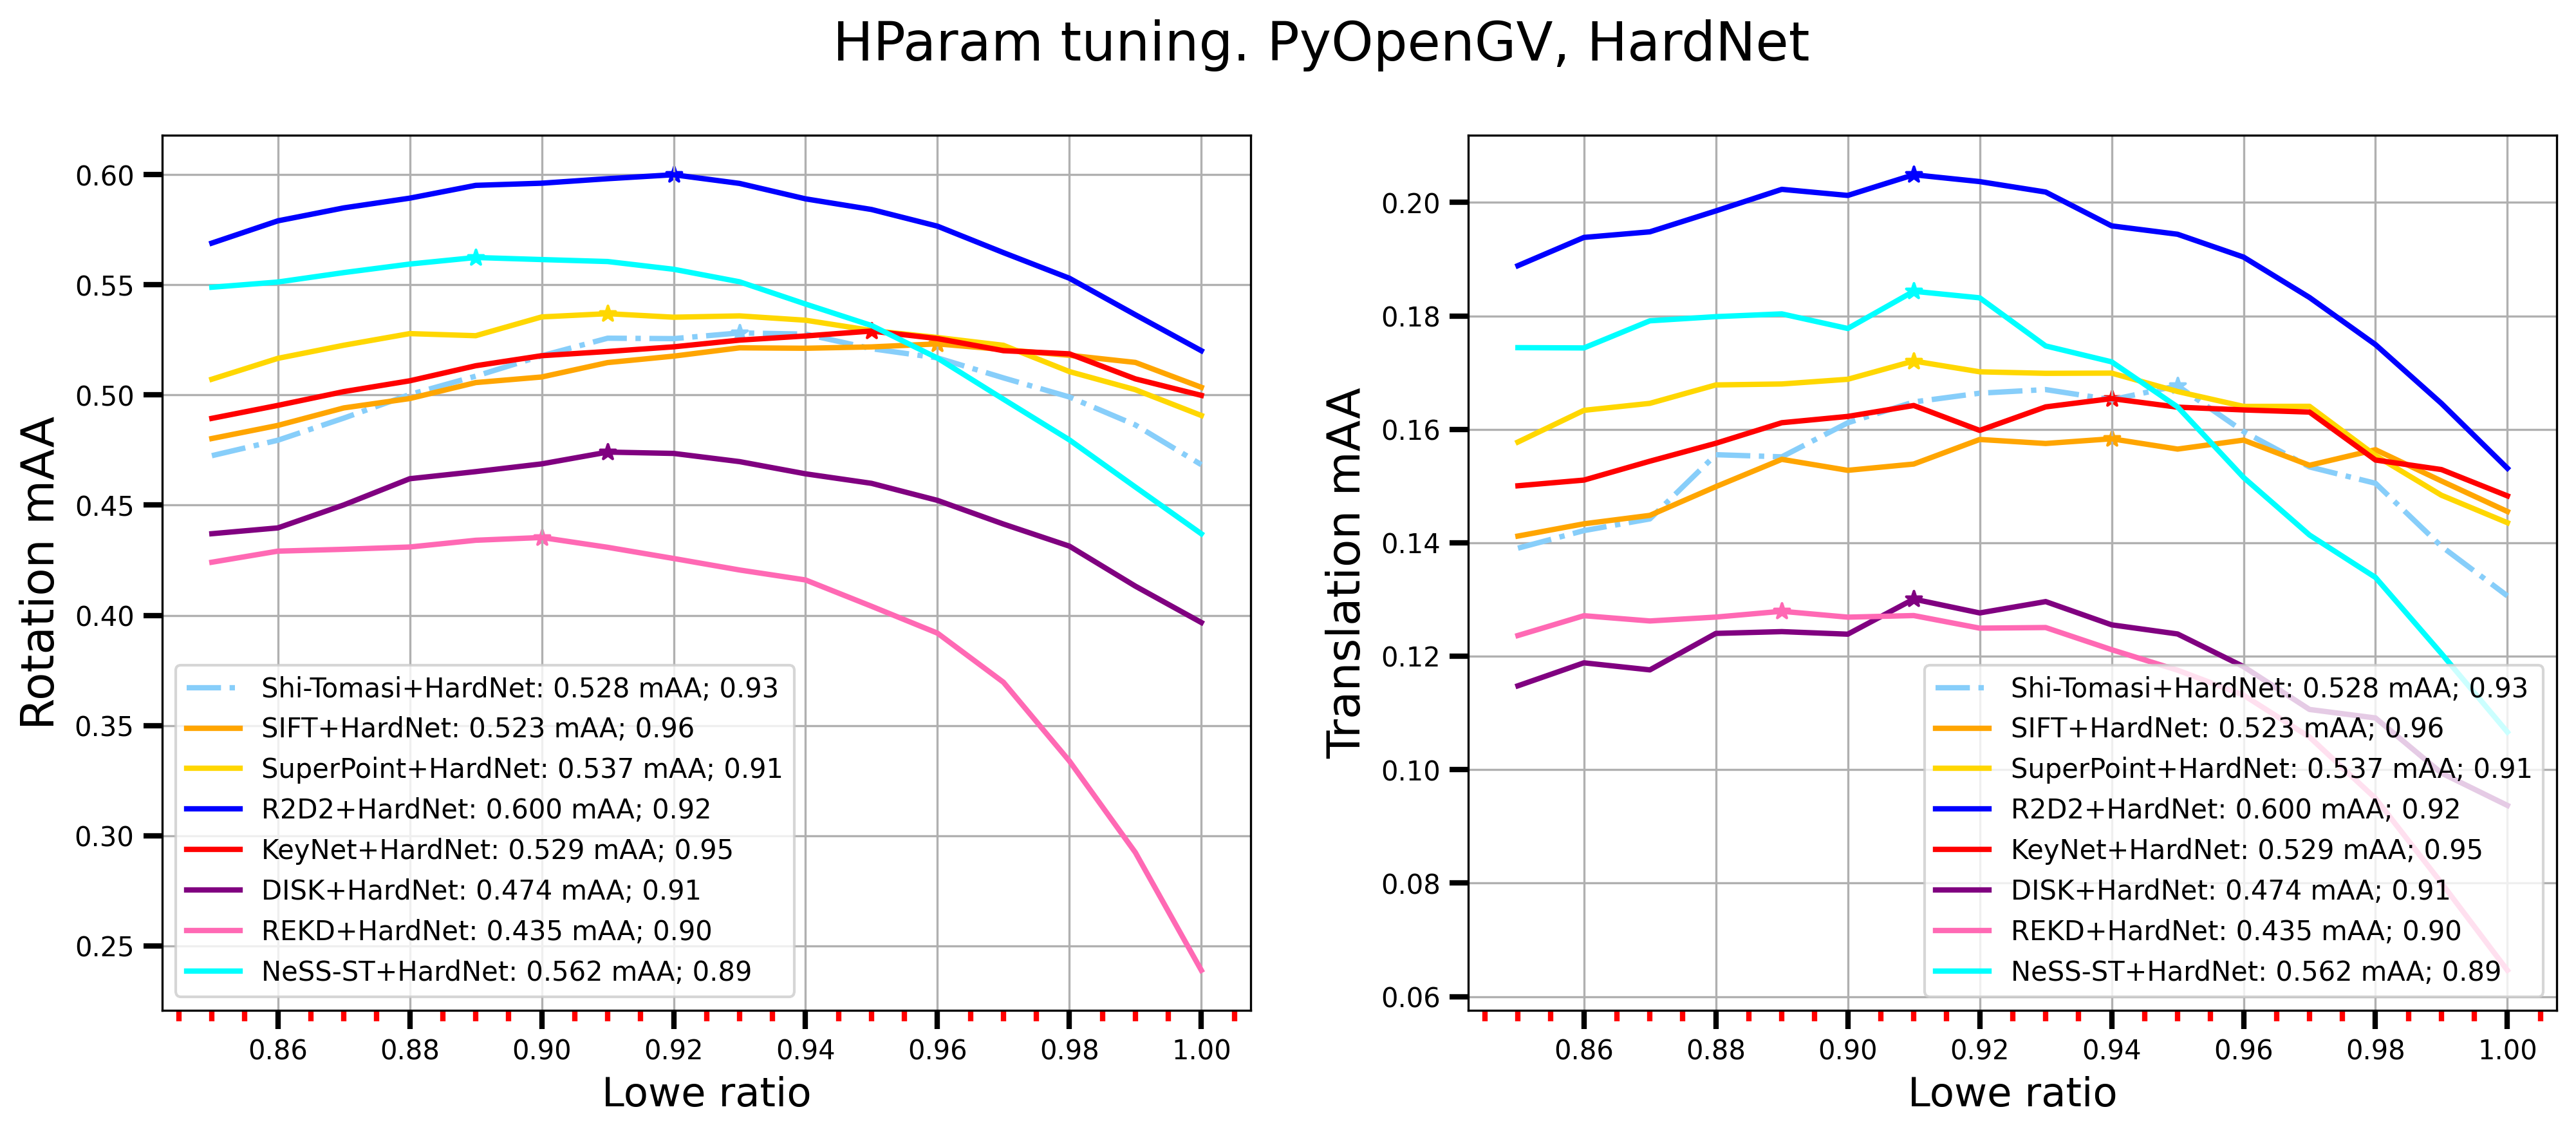

In [7]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

vis_indices = None

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.LOWE_RATIO,
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [8]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.LOWE_RATIO, mAA_list, thresh_list)

HParam tuning. PyOpenGV, HardNet
	 Shi-Tomasi+HardNet: Lowe ratio is 0.93.
	 R: 0.528 mAA, T: 0.167 mAA

	 SIFT+HardNet: Lowe ratio is 0.96.
	 R: 0.523 mAA, T: 0.158 mAA

	 SuperPoint+HardNet: Lowe ratio is 0.91.
	 R: 0.537 mAA, T: 0.172 mAA

	 R2D2+HardNet: Lowe ratio is 0.92.
	 R: 0.600 mAA, T: 0.204 mAA

	 KeyNet+HardNet: Lowe ratio is 0.95.
	 R: 0.529 mAA, T: 0.164 mAA

	 DISK+HardNet: Lowe ratio is 0.91.
	 R: 0.474 mAA, T: 0.130 mAA

	 REKD+HardNet: Lowe ratio is 0.9.
	 R: 0.435 mAA, T: 0.127 mAA

	 NeSS-ST+HardNet: Lowe ratio is 0.91.
	 R: 0.561 mAA, T: 0.184 mAA



## Inlier threshold tuning

In [9]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.INL_THRESH)

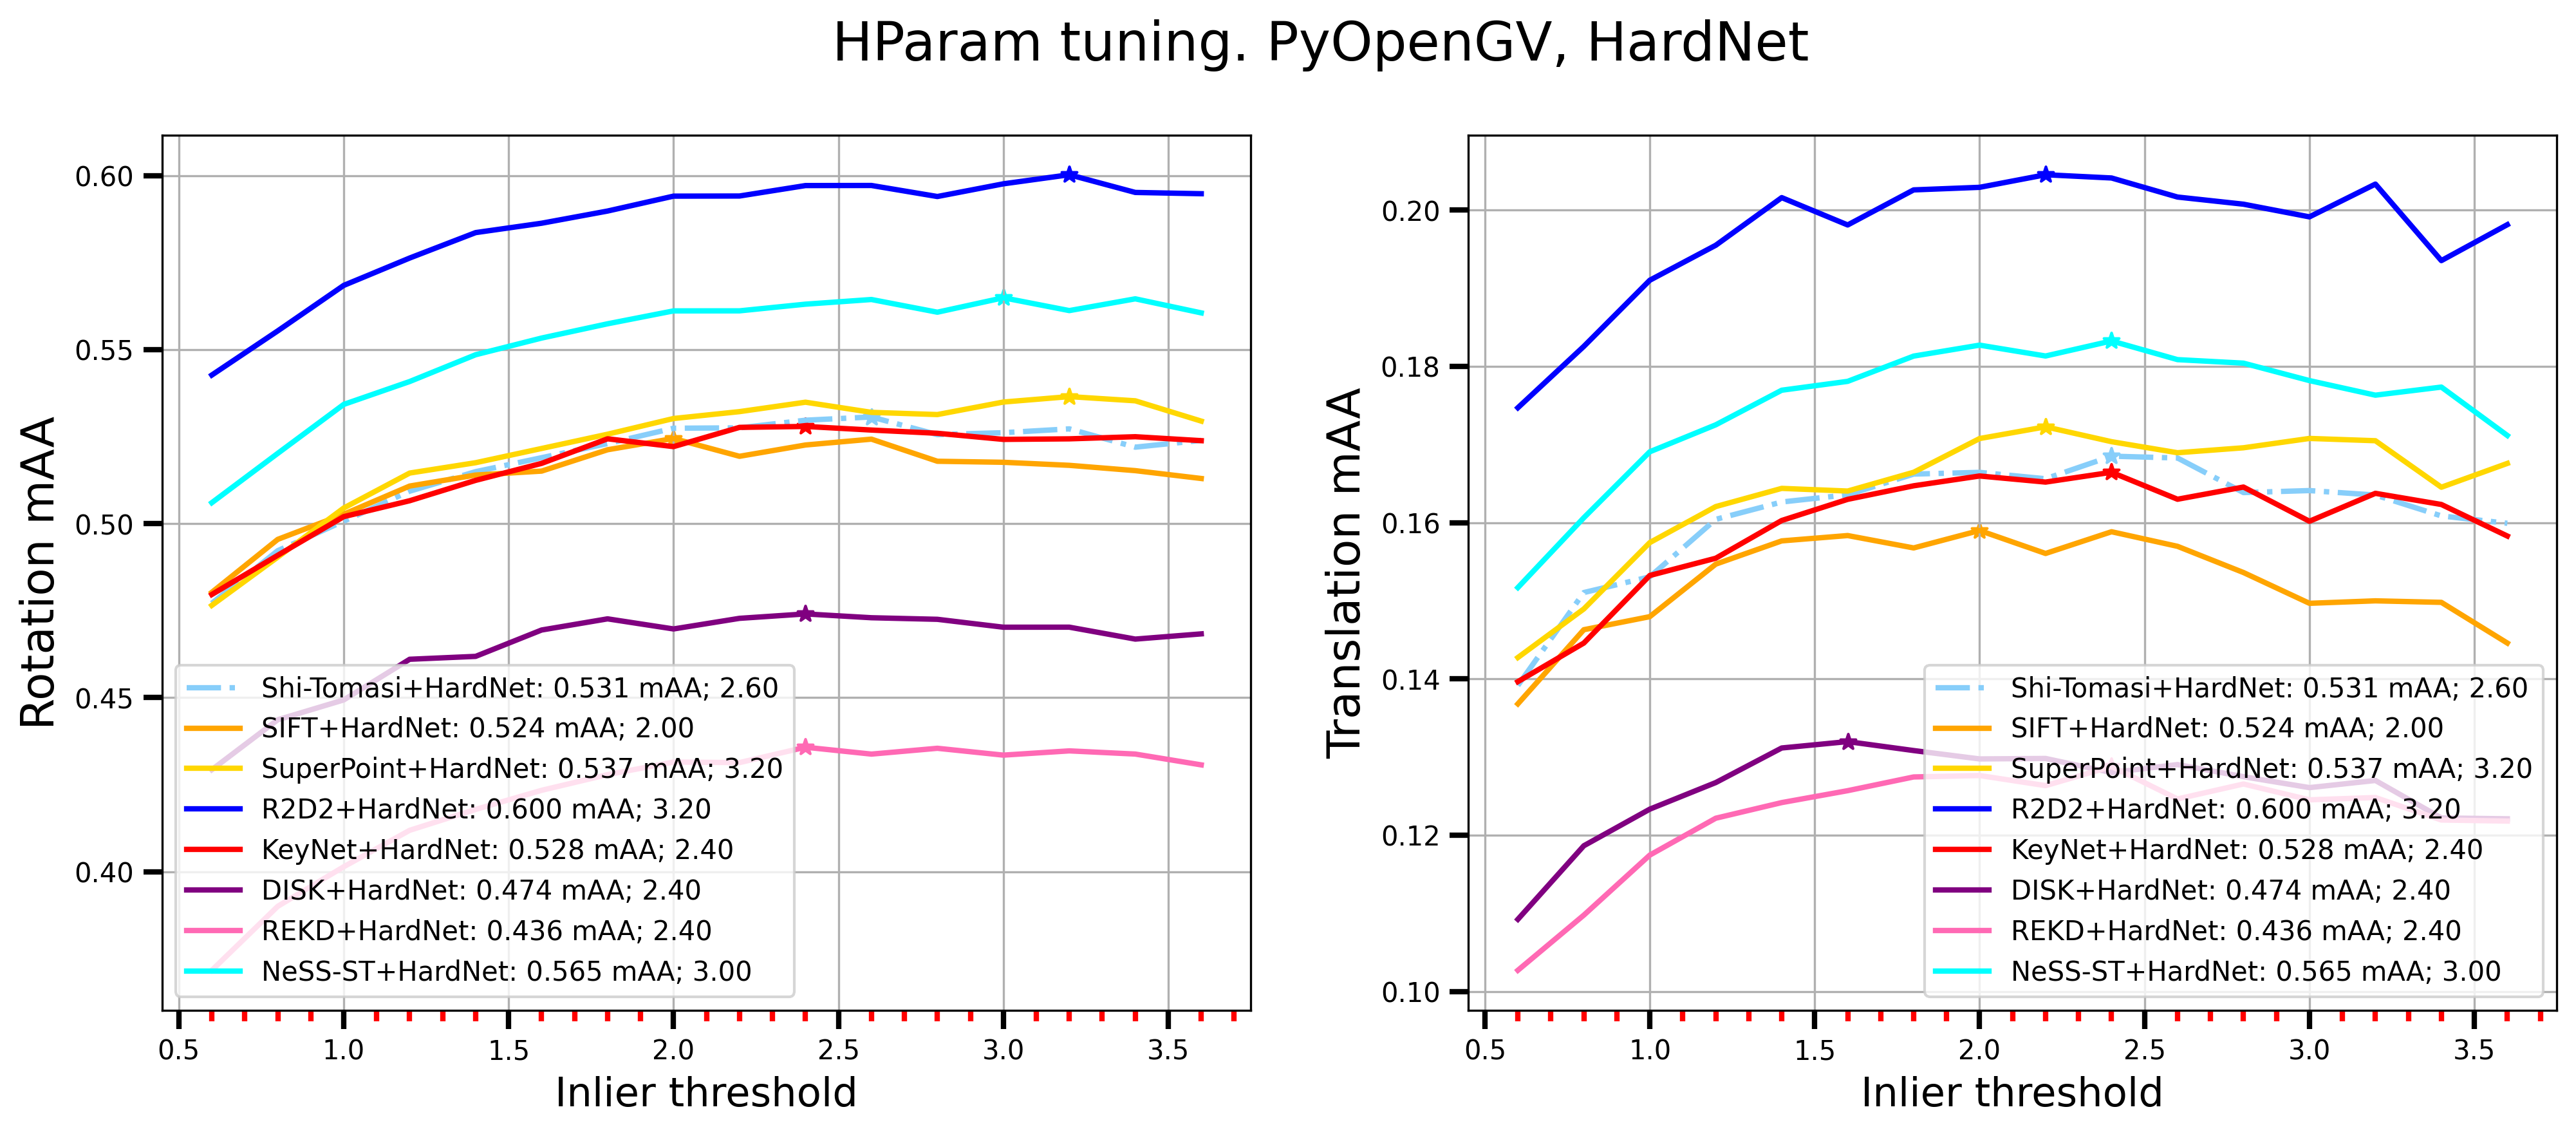

In [10]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.INL_THRESH,
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [11]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.INL_THRESH, mAA_list, thresh_list)

HParam tuning. PyOpenGV, HardNet
	 Shi-Tomasi+HardNet: Inlier threshold is 2.6.
	 R: 0.531 mAA, T: 0.168 mAA

	 SIFT+HardNet: Inlier threshold is 2.0.
	 R: 0.524 mAA, T: 0.159 mAA

	 SuperPoint+HardNet: Inlier threshold is 3.2.
	 R: 0.537 mAA, T: 0.170 mAA

	 R2D2+HardNet: Inlier threshold is 3.2.
	 R: 0.600 mAA, T: 0.203 mAA

	 KeyNet+HardNet: Inlier threshold is 2.4.
	 R: 0.528 mAA, T: 0.166 mAA

	 DISK+HardNet: Inlier threshold is 1.8.
	 R: 0.473 mAA, T: 0.131 mAA

	 REKD+HardNet: Inlier threshold is 2.4.
	 R: 0.436 mAA, T: 0.129 mAA

	 NeSS-ST+HardNet: Inlier threshold is 2.4.
	 R: 0.563 mAA, T: 0.183 mAA

